In [42]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
pcos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PCOS_data.csv')

In [44]:
pcos.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

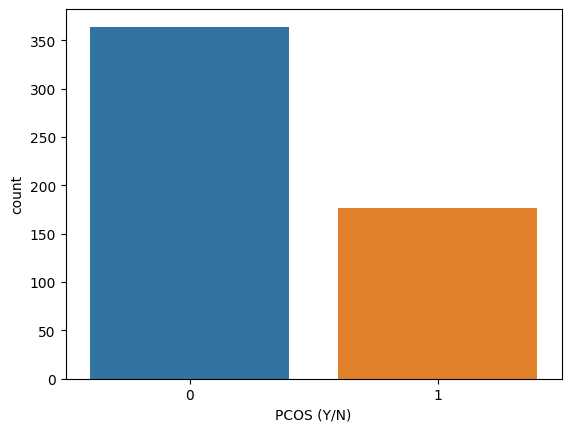

In [45]:
sns.countplot(x = 'PCOS (Y/N)', data = pcos)

<ipython-input-82-6951671a97fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pcos.corr(), annot = True)


<Axes: >

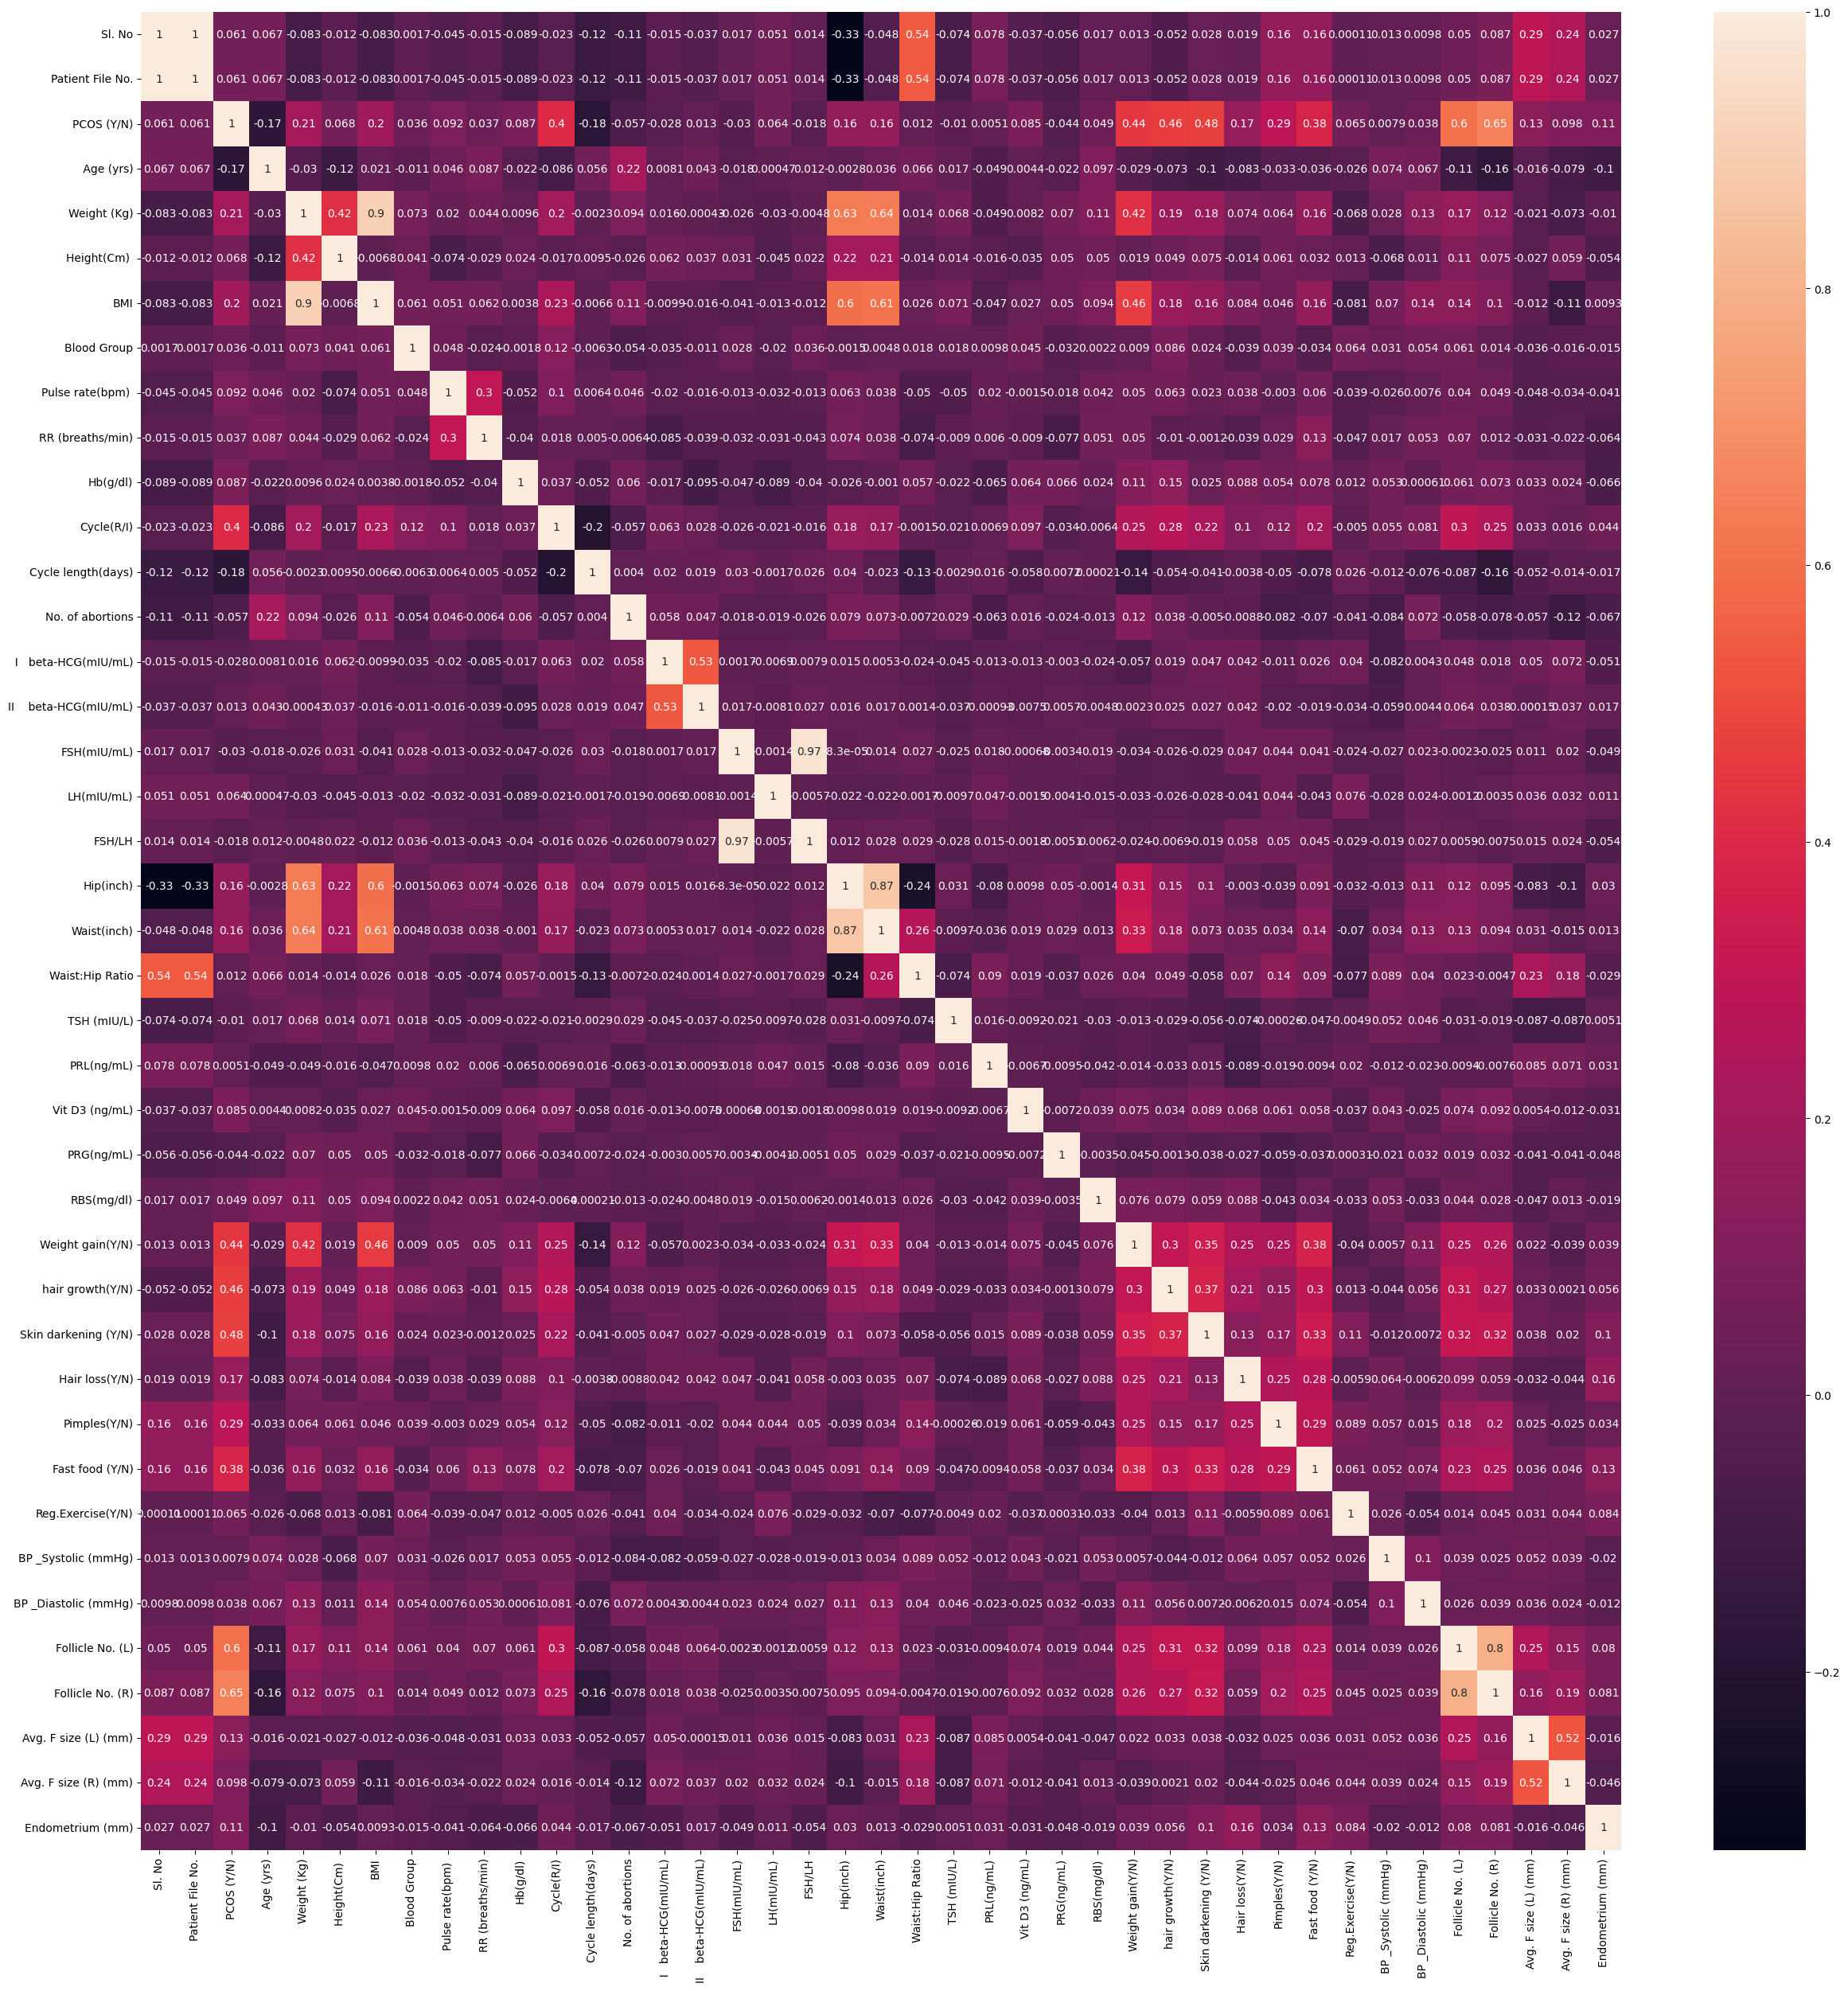

In [82]:
fig, ax = plt.subplots(figsize = (30,30))
sns.heatmap(pcos.corr(), annot = True)

In [47]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [48]:
pcos = pcos.drop(labels = {'Pregnant(Y/N)'}, axis = 1)

In [49]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  No. of abortions        541 non-null    in

In [50]:
pcos = pcos.drop(labels = {'Marraige Status (Yrs)'}, axis = 1)

In [51]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [52]:
pcos['Fast food (Y/N)'] = pcos['Fast food (Y/N)'].fillna(method = 'ffill')

In [53]:
selected_features = {' Age (yrs)', 'Weight (Kg)','BMI','Blood Group','RR (breaths/min)','Hb(g/dl)','Cycle(R/I)','No. of abortions','  I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)','FSH(mIU/mL)','LH(mIU/mL)','Hip(inch)','Waist(inch)','Waist:Hip Ratio','TSH (mIU/L)', 'PRL(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',	'Reg.Exercise(Y/N)','BP _Systolic (mmHg)',	'BP _Diastolic (mmHg)','Follicle No. (L)',	'Follicle No. (R)',	'Avg. F size (L) (mm)',	'Avg. F size (R) (mm)',	'Endometrium (mm)'}

In [54]:
X = pcos[selected_features]

<ipython-input-54-b98209584ff2>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = pcos[selected_features]


In [55]:
y = pcos['PCOS (Y/N)']

In [56]:
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)

In [58]:
X_scaled

array([[0.5       , 0.26086957, 0.26037736, ..., 0.        , 0.00985222,
        0.        ],
       [0.33333333, 0.34782609, 0.47169811, ..., 0.        , 0.04802956,
        0.        ],
       [0.16666667, 0.52173913, 0.48679245, ..., 1.        , 0.03848522,
        0.        ],
       ...,
       [0.33333333, 0.17391304, 0.41509434, ..., 0.        , 0.04356527,
        0.        ],
       [0.33333333, 0.08695652, 0.36981132, ..., 0.        , 0.03786946,
        0.        ],
       [0.33333333, 0.95652174, 0.66792453, ..., 1.        , 0.02493842,
        1.        ]])

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [64]:
X_train.shape

(432, 31)

In [61]:
X_test.shape

(109, 31)

In [62]:
y_train.shape

(432,)

In [63]:
y_test.shape

(109,)

In [68]:
pcos_classifier_model = tf.keras.models.Sequential()
pcos_classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (31,)))
pcos_classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
pcos_classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
pcos_classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [69]:
pcos_classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [70]:
epochs_hist = pcos_classifier_model.fit(X_train, y_train, epochs = 50, batch_size = 512)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.6993 - accuracy: 0.3565
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6356 - accuracy: 0.6759
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5950 - accuracy: 0.6759
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5560 - accuracy: 0.6759
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5108 - accuracy: 0.7407
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4644 - accuracy: 0.8449
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.4230 - accuracy: 0.8588
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3855 - accuracy: 0.8634
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3560 - accuracy: 0.8634
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3380 - accuracy: 0.8634
Epoch 11/50
1/1 [==============

In [71]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

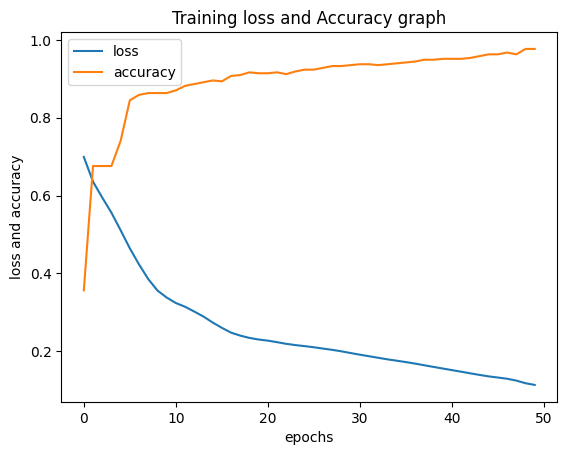

In [74]:
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['accuracy']
plt.plot(eh)
plt.plot(eh2)
plt.title('Training loss and Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('loss and accuracy')
plt.legend({'loss', 'accuracy'})

In [75]:
y_predict = pcos_classifier_model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [76]:
y_predict

array([[3.86739761e-01],
       [2.56066967e-04],
       [3.05045899e-02],
       [1.10952305e-02],
       [9.97563481e-01],
       [4.54995744e-02],
       [6.40342355e-01],
       [8.35400045e-01],
       [1.25600211e-02],
       [9.99711454e-01],
       [7.83936027e-03],
       [9.94064033e-01],
       [5.77859879e-02],
       [1.38672264e-02],
       [4.26557481e-01],
       [1.80100784e-01],
       [3.55566852e-02],
       [1.38758896e-02],
       [6.68703986e-04],
       [6.89525902e-01],
       [3.23145762e-02],
       [6.53160810e-01],
       [9.97699797e-01],
       [8.94688189e-01],
       [5.93441963e-01],
       [1.22932158e-03],
       [4.00103629e-01],
       [1.15776056e-04],
       [6.64799614e-03],
       [1.79084949e-02],
       [9.99410391e-01],
       [1.25881489e-02],
       [8.19326658e-03],
       [9.80450749e-01],
       [3.95046733e-03],
       [1.05099231e-02],
       [2.42706779e-02],
       [6.50708983e-03],
       [9.97733355e-01],
       [2.60108011e-03],


In [77]:
evaluation = pcos_classifier_model.evaluate(X_test, y_test)
print('test accuracy:{}'.format(evaluation[1]))

4/4 [==============================] - 0s 6ms/step - loss: 0.1863 - accuracy: 0.9174
test accuracy:0.9174311757087708


In [78]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
model2.score(X_test, y_test)

0.8990825688073395

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)
model3.score(X_test, y_test)

0.8440366972477065

In [81]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X_train,y_train)
model4.score(X_test, y_test)

0.926605504587156